In [2]:
from __future__ import  absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [3]:
f_mnist = keras.datasets.fashion_mnist
(train_images,train_labels) , (test_images, test_labels) = f_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

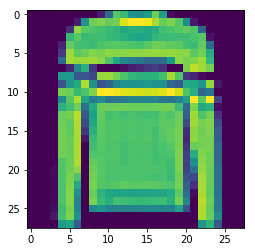

In [9]:
#plt.figure()
plt.imshow(train_images[5])
#plt.colorbar()
#plt.grid(False)
#plt.show()

In [10]:
train_images= train_images/255.0
test_images = test_images/255

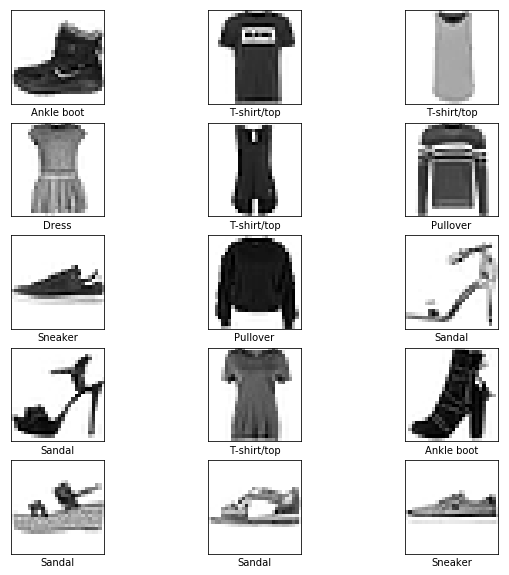

In [11]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

    

In [13]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation ='relu'),
    keras.layers.Dense(10,activation = 'softmax')
    
])

In [14]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [31]:
model.fit(train_images,train_labels,epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2322 - accuracy: 0.9123
Epoch 2/15
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2242 - accuracy: 0.9153
Epoch 3/15
60000/60000 [==============================] - 5s 92us/sample - loss: 0.2168 - accuracy: 0.9189
Epoch 4/15
60000/60000 [==============================] - 5s 92us/sample - loss: 0.2120 - accuracy: 0.9199
Epoch 5/15
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2034 - accuracy: 0.9229
Epoch 6/15
60000/60000 [==============================] - 6s 92us/sample - loss: 0.1974 - accuracy: 0.9259
Epoch 7/15
60000/60000 [==============================] - 6s 95us/sample - loss: 0.1937 - accuracy: 0.9263
Epoch 8/15
60000/60000 [==============================] - 6s 94us/sample - loss: 0.1894 - accuracy: 0.9286
Epoch 9/15
60000/60000 [==============================] - 6s 94us/sample - loss: 0.1836 - accuracy: 0.9309
Epoch 10/15
60

In [32]:
test_loss,test_acc = model.evaluate(test_images,test_labels , verbose = 2) 
print("test accuracy =",test_acc)


10000/1 - 0s - loss: 0.2475 - accuracy: 0.8880
test accuracy = 0.888


In [37]:
prediction = model.predict(test_images)
print(prediction[0])
np.argmax(prediction[0])
test_labels[0]

[8.9876301e-10 2.4529275e-14 2.4043154e-13 3.9221882e-15 8.5568531e-11
 2.2788181e-06 6.6215978e-12 1.6746927e-03 6.3319901e-13 9.9832302e-01]


9

In [45]:
def plot_image(i,prediction_array, true_label, img):
    prediction_array, true_label, img = prediction_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label = np.argmax(prediction_array)
    if predicted_label == true_label:
        color='blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(prediction_array),
                                        class_names[true_label]),
                                        color=color)
def plot_value_array(i, prediction_array, true_label):
    prediction_array, true_label = prediction_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction_array, color='#077777')
    plt.ylim([0,1])
    predicted_label = np.argmax(prediction_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    

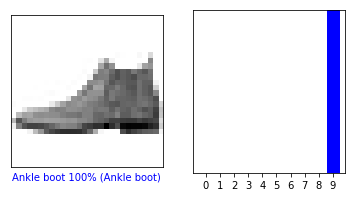

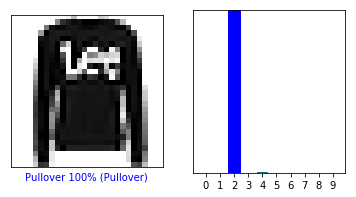

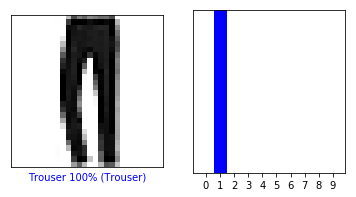

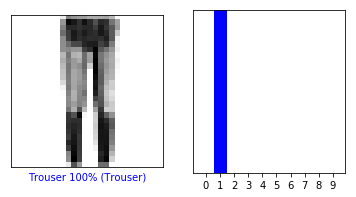

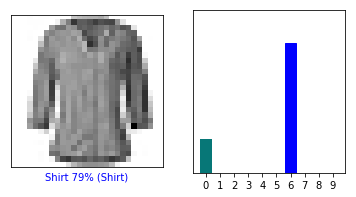

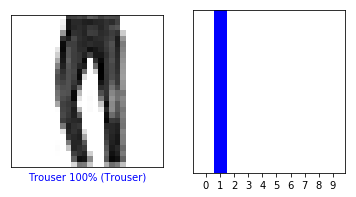

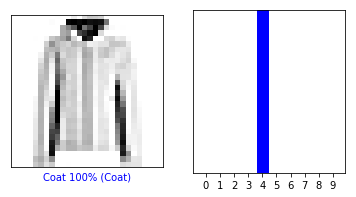

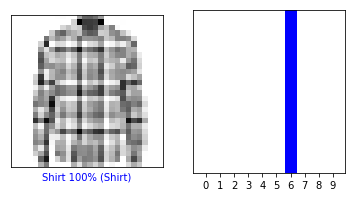

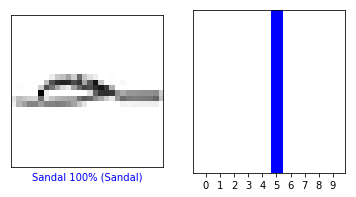

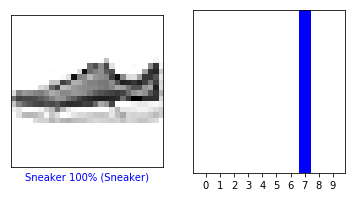

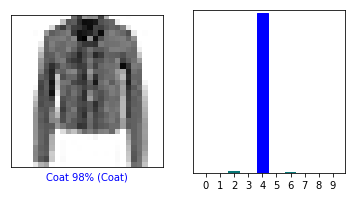

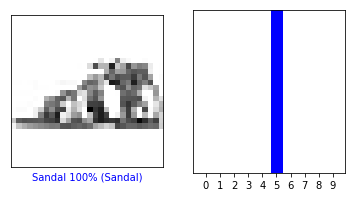

In [48]:
for i in range(12):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, prediction[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, prediction[i], test_labels)
    plt.show()